## Step 4. Exploratory data analysis (Python)

*In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs:
/datasets/project_sql_result_01.csv. It contains the following data:
* company_name: taxi company name
* trips_amount: the number of rides for each taxi company on November 15-16, 2017.

/datasets/project_sql_result_04.csv. It contains the following data:

* dropoff_location_name: Chicago neighborhoods where rides ended
* average_trips: the average number of rides that ended in each neighborhood in November 2017.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as st

In [2]:
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')

In [3]:
df_dropoff_location = pd.read_csv('/datasets/project_sql_result_04.csv')

In [4]:
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
df_dropoff_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
df_dropoff_location.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [8]:
df_company.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [9]:
df_dropoff_location.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [10]:
#converting datatypes
df_dropoff_location['average_trips'] = df_dropoff_location['average_trips'].astype(int)

In [11]:
df_dropoff_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [33]:
df_dropoff_location.nlargest(10, columns=["average_trips"])

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


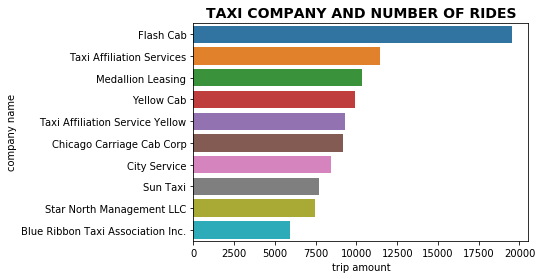

In [34]:
top_data =df_company.nlargest(10, columns='trips_amount')
sns.set_color_codes("pastel")
sns.barplot(y="company_name", x= "trips_amount", data=top_data)
plt.title('TAXI COMPANY AND NUMBER OF RIDES',fontsize=14, fontweight='bold')
plt.xlabel("trip amount")
plt.ylabel('company name')
sns.set_color_codes("muted")
plt.show()

*We can see that flash cab and taxi affiliation services are on the top of the list while the lowest is for blue ribbon taxi.there is a large variation between flash cab and other taxi companys trip amount*

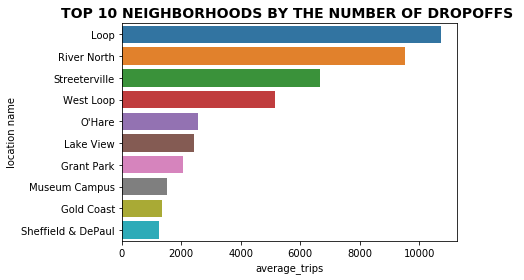

In [17]:
top_data =df_dropoff_location.nlargest(10, columns='average_trips')
sns.set_color_codes("pastel")
sns.barplot(y = 'dropoff_location_name', x= "average_trips", data=top_data)
plt.title('TOP 10 NEIGHBORHOODS BY THE NUMBER OF DROPOFFS ',fontsize=14, fontweight='bold')
plt.xlabel("average_trips")
plt.ylabel('location name')
sns.set_color_codes("muted")
plt.show()

*This graph illustrates that loop and river north are the highest neighborhoods on the number of drop offs while gold coast and sheffield and depaul are on the last 9th and 10th list*

**CONCLUSION**

 *IN THIS STEP two dataset are given ,we made two datframe df and df_.df contains company_name and trips_amount and df_ contains dropoff_location _name . while analysing the top 10 company and location we got the following results
 * The first graph presented that flash cab and taxi affiliation services are on the top of the list while the lowest is for blue ribbon taxi.there is a large variation between flash cab and other taxi companys trip amount
 * The second graph shows that loop and river north are the highest neighborhoods on the number of drop offs while gold coast and sheffield and depaul are on the last 9th and 10th list

## Step 5. Testing hypotheses (Python)

*/datasets/project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:*
* start_ts
  *  pickup date and time
* weather_conditions
  *  weather conditions at the moment the ride started
* duration_seconds
  * ride duration in seconds
Test the hypothesis:
1. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
2. Decide where to set the significance level (alpha) on your own.*
 
  **Explain:**
* how you formed the null and alternative hypotheses
what criterion you used to test the hypotheses and why

In [18]:
df_rides = pd.read_csv('/datasets/project_sql_result_07.csv')

In [19]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [20]:
df_rides.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [21]:
df_rides["start_ts"] = pd.to_datetime(df_rides["start_ts"])

In [22]:
df_rides.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [23]:
df_rides.isnull().sum()#checking the  missing values

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [24]:
df_rides[df_rides.duplicated()]
#df_rides.duplicated().sum()

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [25]:
df_rides.start_ts.value_counts()

2017-11-11 10:00:00    48
2017-11-04 14:00:00    46
2017-11-04 12:00:00    46
2017-11-11 06:00:00    45
2017-11-11 08:00:00    43
                       ..
2017-11-25 03:00:00     1
2017-11-18 00:00:00     1
2017-11-25 19:00:00     1
2017-11-25 04:00:00     1
2017-11-04 00:00:00     1
Name: start_ts, Length: 81, dtype: int64

as we have 1068 entries out of which 197 rows are duplicates 

In [26]:
bad_rides = df_rides[(df_rides["start_ts"].dt.weekday==5)&(df_rides["weather_conditions"]!="Good")]["duration_seconds"].values

In [27]:
good_rides = df_rides[(df_rides["start_ts"].dt.weekday==5)&(df_rides["weather_conditions"]=="Good")]["duration_seconds"].values

In [35]:
from scipy.stats import levene
import numpy as np 
stat, p = levene(bad_rides,good_rides)
p


0.5332038671974493

In [29]:
[np.var(x, ddof=1) for x in [bad_rides,good_rides]]

[520294.086002483, 576382.009689509]

sample variance of good rides is different and greater from bad rides

Let's choose standard the significance level (actually it really depends on sample size, but anyway let's leave standard level) and let's state:

$H_0$="The average duration of rides from the Loop to O'Hare International Airport doesn't change"

$H_1$="The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

we will test by avg value and after that also will check both avg values

Hypotheses are stated correctly.

In [30]:
alpha = 0.05

In [31]:
H_0 = "The average duration of rides from the Loop to O'Hare International Airport doesn't change"
H_1 = "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [32]:
result = stats.ttest_ind(bad_rides, good_rides)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print(H_1)
else:
    print(H_0)
print("checking:")
print(f"bad weather, mean={bad_rides.mean():.2f}")
print(f"good weather, mean={good_rides.mean():.2f}")

pvalue: 6.517970327099473e-12
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
checking:
bad weather, mean=2427.21
good weather, mean=1999.68


**CONCLUSION**


** we have 3 datasets given to analyze the data .from thr first two dataset,ehich are given ,we made two datframe df_company and df_dropoff_location.df_company contains company_name and trips_amount and df_dropoff_location contains dropoff_location _name. 
df_company contain the  following data:
* company_name: taxi company name
* trips_amount: the number of rides for each taxi company on November 15-16, 2017.

df_dropofflocation contains the following data:

* dropoff_location_name: Chicago neighborhoods where rides ended
* average_trips: the average number of rides that ended in each neighborhood in November 2017.

third dataframe contains data on rides from the Loop to O'Hare International Airport.  these are the table's field values:**
* start_ts
pickup date and time

* weather_conditions
weather conditions at the moment the ride started
* duration_seconds
ride duration in seconds

df_company and df_dropofflocation does n ot contain any miussing values we converted the datatype to int for for average trips.
while obseving the third dataframe data it can be seen that the data contain 1068 entries out of which 197 are duplicate entries.we converted the data in start ts to datetime format .looking into missing values there is no missing value in this data.

hence it can be concluded.
1. The first graph presented that flash cab and taxi affiliation services are on the top of the list while the lowest is for blue ribbon taxi.there is a large variation between flash cab and other taxi companys trip amount
2. The second graph shows that loop and river north are the highest neighborhoods on the number of drop offs while gold coast and sheffield and depaul are on the last 9th and 10th list
3. we did the levene test to check the null hypothesis, that all input samples are with equal variances,we got the results as p value 0.5332038671974493 and while checking goodrides and bad rides sample variance we got the results as [520294.086002483, 576382.009689509]
3. . we took the alpha values to .05 and checked the hypothesis .
4. . while stastical test with equal var false it can be seen that we dont have a statistically significant differences between good rides and bad rides on saturdays
5. . we took the value of alpha as .05 and got the results as pvalue: 6.517970327099473e-12
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
checking:
bad weather, mean=2427.21
good weather, mean=1999.68
 
flashcab and taxiaffilation sevices are best on the basis of trip amount and on the basis of number of dropoffs loop and river north are the highest neighborhoods on the basis of trips .while testing the hypothesis it can be seen that duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
